# 1. Import necessary libraries and setup working

Machine Learning in Python with scikit-learn
Breast Cancer dataset analysis (classification problem)
Author: Irina Chelysheva, ipynb edited version from Kristian Gurashi

Date: Dec 5th, 2025
Breast Cancer Wisconsin (Diagnostic) Data Set extracted from UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [30]:
# Identifying script folder
cwd = os.getcwd()

# Defining work directory
wd = os.path.dirname(cwd)

# Defining data directory
data_dir = os.path.join(wd, 'Data')

# 2. Load, explore and prepare the dataset

In [31]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv"
df = pd.read_csv(url)
print("Total data points",df.shape[0])
print("Total number of features(as number of columns) are ", df.shape[1])
df.describe()
df.head()
#Column Class contains the target variable - 0 (benign) and 1 (malignant)


Total data points 699
Total number of features(as number of columns) are  11


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


# Check skewness of the data

In [32]:
skewness_before = df.select_dtypes(include=np.number).apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewness before transformation:")
print(skewness_before) #We don't include ID as it is categorical, so the rest is not too skewed

Skewness before transformation:
Id                 13.675326
Mitoses             3.560658
Epith.c.size        1.712172
Marg.adhesion       1.524468
Normal.nucleoli     1.422261
Cell.size           1.233137
Cell.shape          1.161859
Bl.cromatin         1.099969
Bare.nuclei         0.990016
Class               0.654564
Cl.thickness        0.592859
dtype: float64


In [33]:
# Define feature matrix X and target variable y
X = df.drop(['Id', 'Class'], axis=1)  # Feature matrix without 'Id' and 'Class'
y = df['Class']  # Target variable
class_counts = df['Class'].value_counts() 
print(class_counts) #We need to handle imbalanced classes

Class
0    458
1    241
Name: count, dtype: int64


In [34]:
#Check for null values
null_values = df.isnull().values.any()
if null_values == True:
    print("There are some missing values in data")
else:
    print("There are no missing values in the dataset")

There are some missing values in data


In [35]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#Note that if the data has extreme variance then it requires some kind of transformation e.g. log transformation before applying mean imputation
#Thus check imputation prior

# 3. Split the dataset into training and testing sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=1, stratify=y)

#Stratify here maintains the class distribution in both train and test sets

In [37]:
X_train

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
39,2.0,5.0,3.0,3.0,6.0,7.0,7.0,5.0,1.0
261,5.0,10.0,10.0,6.0,10.0,10.0,10.0,6.0,5.0
375,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
131,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
185,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
178,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
525,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
642,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
122,10.0,10.0,10.0,2.0,10.0,10.0,5.0,3.0,3.0


In [38]:
y_train

39     1
261    1
375    0
131    0
185    0
      ..
178    0
525    0
642    0
122    1
102    0
Name: Class, Length: 489, dtype: int64

# 4. Optional example of feature selection using SelectKBest with ANOVA F-test

We are not running this but these provides examples on how to select features removing those redundant/non-informative

In [41]:
# select_k_best = SelectKBest(f_classif, k='all')  # We will just use 'all' to select all features
# #Note: You can also use chi-square but only on non-negative input feature
# X_train_kbest = select_k_best.fit_transform(X_train, y_train)
# X_test_kbest = select_k_best.transform(X_test)
# print("Selected features using SelectKBest:", X.columns[select_k_best.get_support(indices=True)])

In [43]:
# Optional example of Recursive Feature Elimination (RFE) using Logistic Regression
rfe = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=9)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
print("Features selected by RFE:", X.columns[rfe.get_support(indices=True)])

Features selected by RFE: Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses'],
      dtype='object')


In [44]:
# 5. Choosing the best classification model using selected features
# Subset data based on feature selection (using SelectKBest features)
X_a_train, X_a_test = X_train_rfe, X_test_rfe

In [47]:
# Define models for evaluation
models = [
    ('LR', LogisticRegression(max_iter=500)), 
    ('KNN', KNeighborsClassifier()), 
    ('DTC', DecisionTreeClassifier(random_state=1)), 
    ('SVM', SVC(gamma='auto', probability=True)),
    ('RF', RandomForestClassifier(random_state=1))
]

In [48]:
# Evaluate each model using 10-fold cross-validation
seed = 7
scoring = 'accuracy'
results, names = [], []
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

In [49]:
print("\nModel Evaluation Results:")
for name, model in models:
    cv_results = cross_val_score(model, X_a_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f} (Std = {cv_results.std():.4f})')


Model Evaluation Results:
LR: Mean Accuracy = 0.9734 (Std = 0.0224)
KNN: Mean Accuracy = 0.9714 (Std = 0.0208)
DTC: Mean Accuracy = 0.9243 (Std = 0.0331)
SVM: Mean Accuracy = 0.9589 (Std = 0.0359)
RF: Mean Accuracy = 0.9652 (Std = 0.0243)


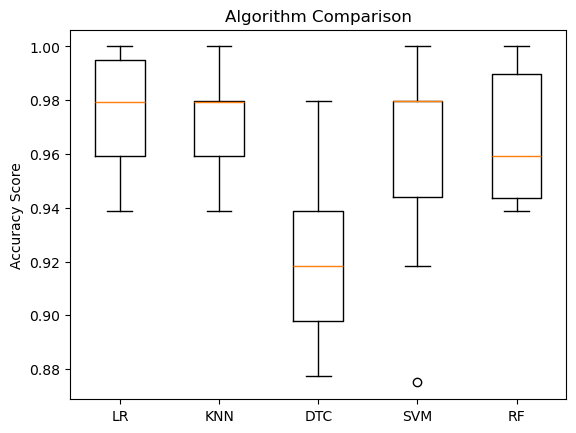

In [50]:
# Plot the comparison of model performance
plt.boxplot(results, tick_labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy Score')
plt.show()

# 6. Train the best-performing model and evaluate it

In [51]:
best_model = LogisticRegression(random_state=1)
best_model.fit(X_a_train, y_train)  # Train on the training data
predictions = best_model.predict(X_a_test)  # Make predictions on the test data

# 7. Evaluate the model using various metrics

In [ ]:
print("\nBest Model Evaluation on Test Set:")
print(f"Accuracy Score: {accuracy_score(y_test, predictions):.4f}")
print("\nClassification Report:\n", classification_report(y_test, predictions))
#The model is overfitted if it provides better accuracy on training data compared to test data
#If it is within a standard deviation range, then it is acceptable
#Adding more data can help reduce overfitting
#Higher the scores the better the results


Best Model Evaluation on Test Set:
Accuracy Score: 0.9429

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       138
           1       0.93      0.90      0.92        72

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.94       210
weighted avg       0.94      0.94      0.94       210



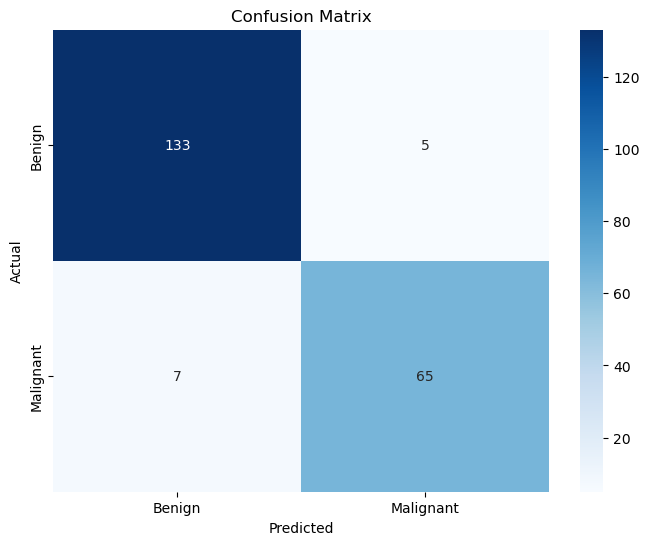

In [53]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 8. ROC Curve

In [54]:
# Obtain predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_a_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

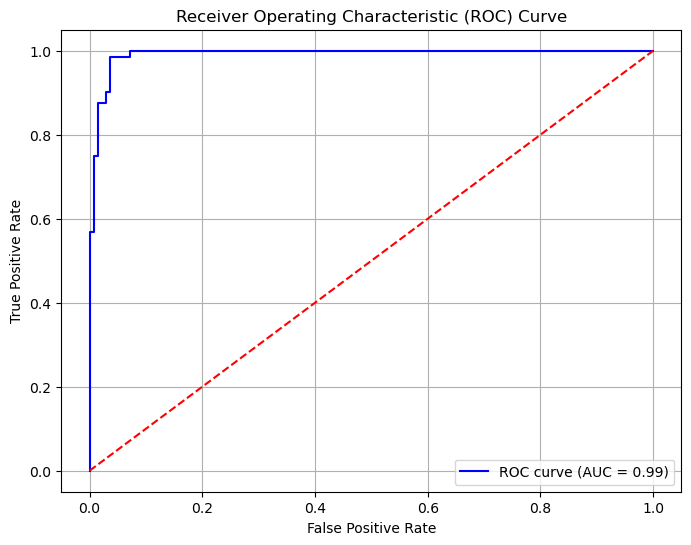

In [ ]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#In an ideal model, the ROC curve should rise quickly towards the top-left corner, indicating a high true positive rate and a low false positive rate.
#This test also provides information about sensitivity vs specificity of the model.

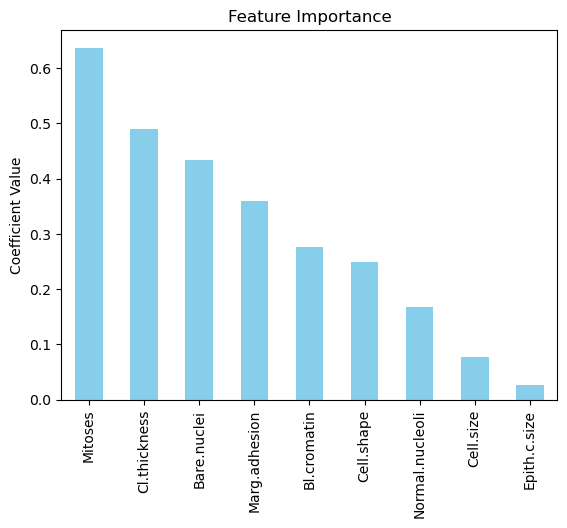

In [ ]:
# Feature Importance using coefficients
feature_importance = pd.Series(best_model.coef_[0], index=X.columns[select_k_best.get_support(indices=True)])
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Coefficient Value')
plt.show()
#Note: try it yourself - choose only important features using the feature selection above
#Rerun the predictions again - how did the reduction in number of features affected predictions?

# 9. Export the trained model

In [60]:
import joblib
joblib.dump(best_model, os.path.join(wd, 'Models', 'ML', 'best_model.joblib'))
print("Model exported as 'best_model.joblib'")

Model exported as 'best_model.joblib'
